In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
try:
    df=sns.load_dataset('titanic')
    print('Your Dataset Loaded Successfullu')
except:
    print('Your Dataset is not Loaded Successfullu')

Your Dataset Loaded Successfullu


In [3]:
df=df.drop(['embark_town','alive','embarked'],axis=1)

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,man,True,NaN,True
887,1,1,female,19.0,0,0,30.0000,First,woman,False,B,True
888,0,3,female,NaN,1,2,23.4500,Third,woman,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,First,man,True,C,True


In [5]:
fig_1=px.violin(df,x='age')
fig_1.show()

In [6]:
fig_2=px.violin(df,x='parch')
fig_2.show()

In [7]:
fig_2=px.box(df,x='fare')
fig_2.show()

In [8]:
fig_2=px.area(df,x='sibsp')
fig_2.show()

In [9]:
from sklearn.model_selection import train_test_split
X=df.drop('survived',axis=1)
y=df['survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,StandardScaler
from xgboost import XGBRFRegressor

cat=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])

num=Pipeline([
    ('imputer',KNNImputer(n_neighbors=50)),
    ('scaler',StandardScaler())
])

preprocessor=ColumnTransformer([
    ('cats',cat,selector(dtype_include=['object','category'])),
    ('nums',num,selector(dtype_include=['number']))

])

model=Pipeline([
    ('preprocessing',preprocessor),
    ('model',XGBRFRegressor())
])


In [11]:
model

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cats', ...), ('nums', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20],
    'model__learning_rate':[0.3]
}
cv=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    n_jobs=3,
    verbose=1,
    scoring='accuracy'
)

cv.fit(X_train,y_train)
y_pred=cv.predict(X_test).astype(int)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [14]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [16]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred,average='micro'))
print('Recall Score',recall_score(y_test,y_pred,average='micro'))
print('F1 Score',f1_score(y_test,y_pred,average='micro'))
print('Confusion Matrix ',confusion_matrix(y_test,y_pred))
print('\nClassification Report\n ',classification_report(y_test,y_pred))

Accuracy Score 0.5865921787709497
Precision Score 0.5865921787709497
Recall Score 0.5865921787709497
F1 Score 0.5865921787709497
Confusion Matrix  [[105   0]
 [ 74   0]]

Classification Report
                precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



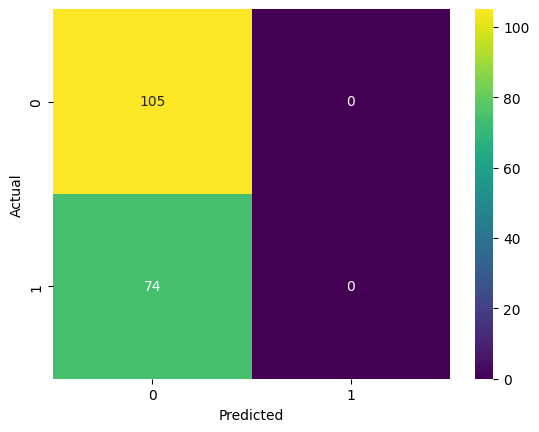

In [19]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.show()